<a href="https://colab.research.google.com/github/jibook/git-remote/blob/master/TensorFlow_12_Deep_Learning_for_text_and_sequences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
 
timesteps = 100 
input_features = 32 
output_features = 64 

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features,)) 

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,)) 

successive_outputs = [] 
for input_t in inputs: 
  output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
  successive_outputs.append(output_t) 
  state_t = output_t 

final_output_sequence = np.concatenate(successive_outputs, axis=0) 

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.datasets import imdb 
from keras.preprocessing import sequence 

max_features = 10000 
maxlen = 500 
batch_size = 32 

print('Loading data...') 
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features) 
print(len(input_train), 'train sequences') 
print(len(input_test), 'test sequences')
 
print('Pad sequences (samples x time)') 
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape) 
print('input_test shape:', input_test.shape)

Loading data...
17473536/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [ ]:
from keras.layers import Dense 
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid')) 
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 25s 150ms/step - loss: 0.5755 - acc: 0.6887 - val_loss: 0.5393 - val_acc: 0.7254
Epoch 2/10
157/157 [==============================] - 24s 151ms/step - loss: 0.3557 - acc: 0.8557 - val_loss: 0.4603 - val_acc: 0.7810
Epoch 3/10
157/157 [==============================] - 24s 152ms/step - loss: 0.2916 - acc: 0.8844 - val_loss: 0.4113 - val_acc: 0.8406
Epoch 4/10
157/157 [==============================] - 23s 148ms/step - loss: 0.2349 - acc: 0.9099 - val_loss: 0.3454 - val_acc: 0.8670
Epoch 5/10
157/157 [==============================] - 23s 148ms/step - loss: 0.1754 - acc: 0.9341 - val_loss: 0.3858 - val_acc: 0.8380
Epoch 6/10
157/157 [==============================] - 23s 148ms/step - loss: 0.1415 - acc: 0.9506 - val_loss: 0.3802 - val_acc: 0.8622
Epoch 7/10
157/157 [==============================] - 23s 149ms/step - loss: 0.0927 - acc: 0.9697 - val_loss: 0.4586 - val_acc: 0.8374
Epoch 8/10
157/157 [==============================] - 2

<Figure size 432x288 with 0 Axes>

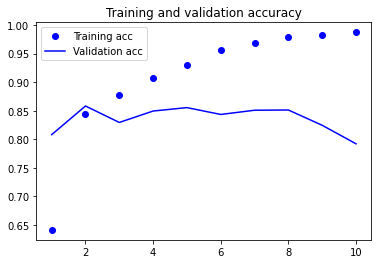

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt 
acc = history.history['acc'] 
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss'] 
epochs = range(1, len(acc) + 1) 
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy')
plt.legend() 
plt.figure()

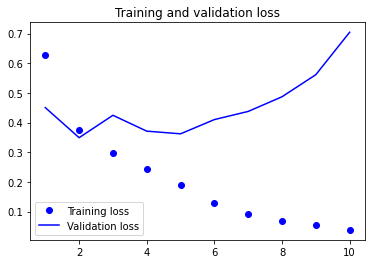

In [ ]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss') 
plt.legend() 
plt.show()

- LSTM 으로 진행

In [ ]:
from keras.layers import LSTM 
model = Sequential()
model.add(Embedding(max_features, 32)) 
model.add(LSTM(32)) 
model.add(Dense(1, activation='sigmoid')) 
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc']) 
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 54s 329ms/step - loss: 0.5209 - acc: 0.7495 - val_loss: 0.3915 - val_acc: 0.8390
Epoch 2/10
157/157 [==============================] - 51s 327ms/step - loss: 0.2977 - acc: 0.8810 - val_loss: 0.3195 - val_acc: 0.8814
Epoch 3/10
157/157 [==============================] - 52s 328ms/step - loss: 0.2403 - acc: 0.9083 - val_loss: 0.3431 - val_acc: 0.8820
Epoch 4/10
157/157 [==============================] - 51s 325ms/step - loss: 0.1998 - acc: 0.9270 - val_loss: 0.2877 - val_acc: 0.8914
Epoch 5/10
157/157 [==============================] - 51s 327ms/step - loss: 0.1827 - acc: 0.9336 - val_loss: 0.3161 - val_acc: 0.8716
Epoch 6/10
157/157 [==============================] - 51s 326ms/step - loss: 0.1608 - acc: 0.9446 - val_loss: 0.3295 - val_acc: 0.8862
Epoch 7/10
157/157 [==============================] - 51s 326ms/step - loss: 0.1481 - acc: 0.9481 - val_loss: 0.3326 - val_acc: 0.8698
Epoch 8/10
157/157 [==============================] - 5

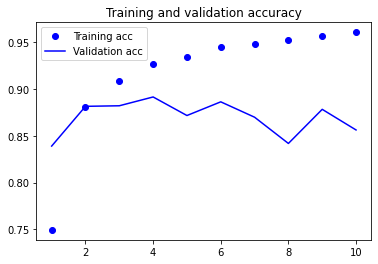

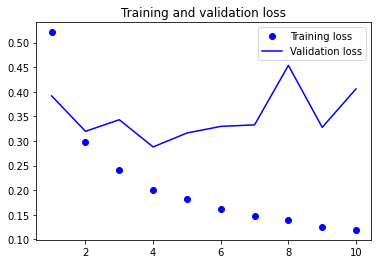

In [ ]:
import matplotlib.pyplot as plt 
acc = history.history['acc'] 
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss'] 
epochs = range(1, len(acc) + 1) 
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend() 
plt.figure() 
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss') 
plt.legend() 
plt.show()